<a href="https://colab.research.google.com/github/Abhishek-D7/Mall-Customer-Segmentation-Project/blob/main/Mall_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Data = pd.read_csv("D:\Data sets\Clustering\Customers.csv")
Data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
Data.drop('CustomerID' , axis =1 , inplace = True)

In [ ]:
df = Data.copy()

In [ ]:
df.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
df['Profession'].fillna(df['Profession'].mode()[0], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              2000 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [ ]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='count'>

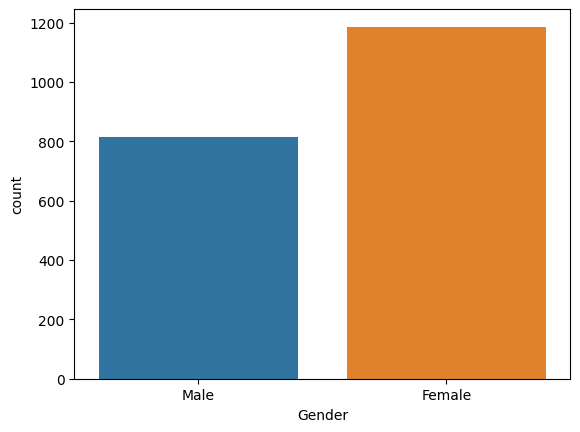

In [ ]:
sns.countplot(data = df , x='Gender')

In [ ]:
df['Profession'].value_counts()

Profession
Artist           647
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [ ]:
df['Family Size'].value_counts()

Family Size
2    361
3    311
1    299
4    289
5    258
6    243
7    234
8      4
9      1
Name: count, dtype: int64

As we can see that Female customer as dominante in Shopping or buy thing

<Axes: xlabel='count', ylabel='Profession'>

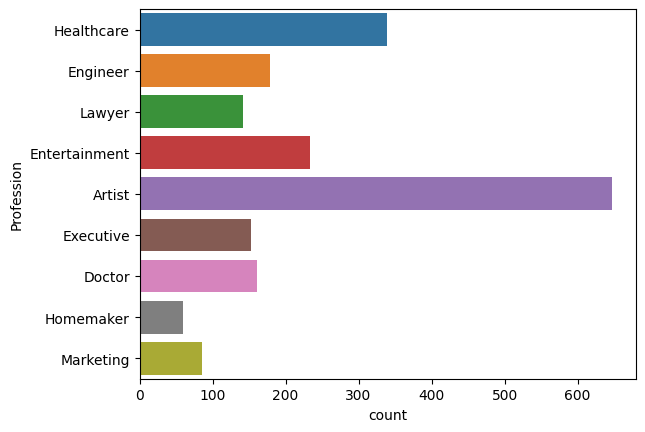

In [ ]:
sns.countplot(data = df , y='Profession')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income ($)'>

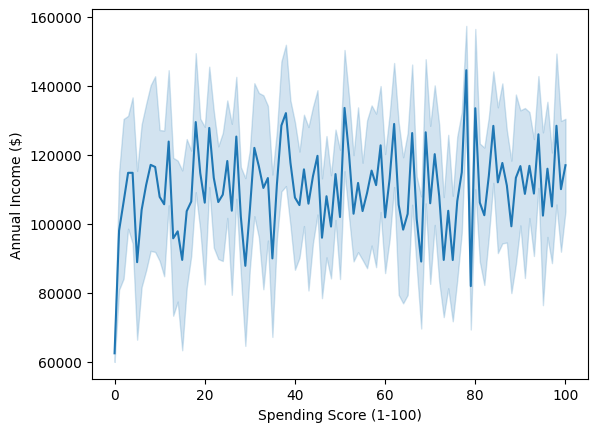

In [ ]:
sns.lineplot(data = df , y = 'Annual Income ($)' , x = 'Spending Score (1-100)')

<Axes: xlabel='Family Size', ylabel='Annual Income ($)'>

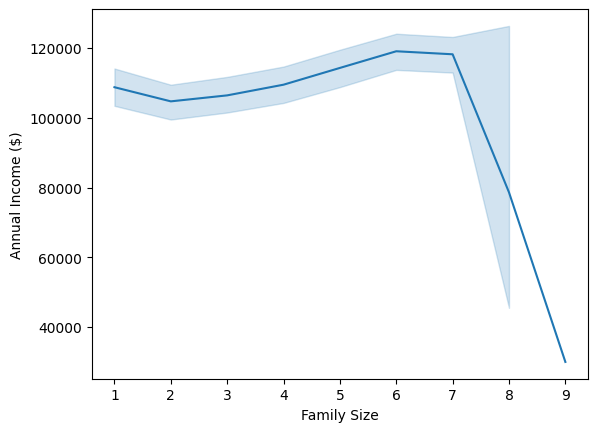

In [ ]:
sns.lineplot(data = df , y ='Annual Income ($)', x = 'Family Size')

Family Size between 1 to 7 the have good annual salary upto 100000($) but when Family size more than 7 Annual Salary drastically Decrease till Family Size 9 .

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

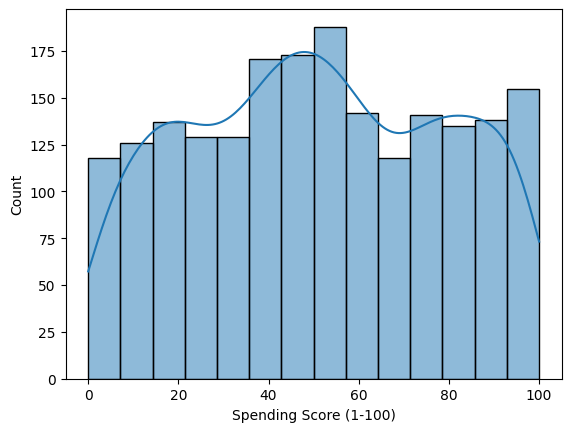

In [ ]:
sns.histplot(data = df , x='Spending Score (1-100)'  , kde =True )

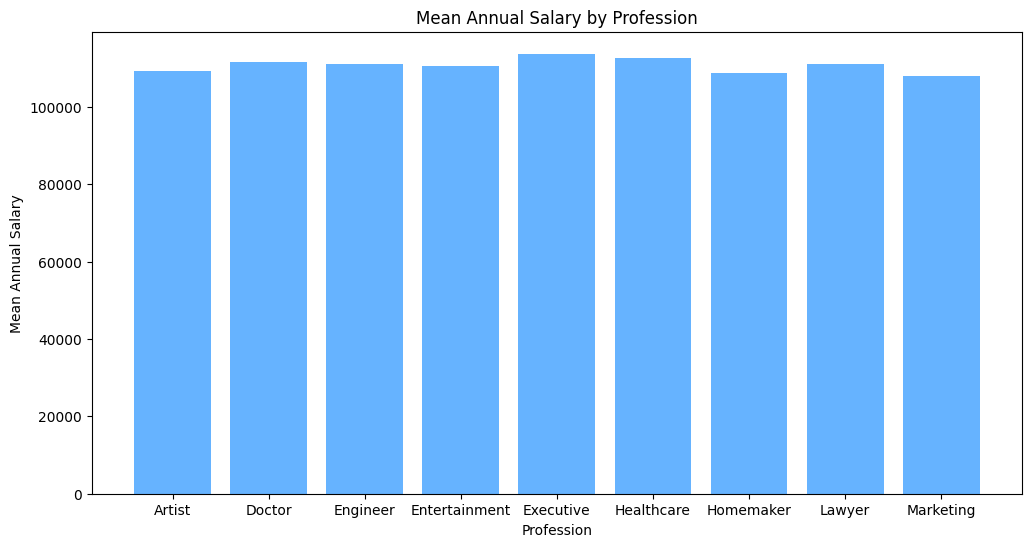

In [ ]:
columns_to_drop = ['Spending Score (1-100)','Gender','Work Experience','Family Size','Age']
z = df.drop(columns=columns_to_drop , axis = 1 , inplace = False)
grouped_data = df.groupby('Profession')['Annual Income ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.bar(grouped_data['Profession'], grouped_data['Annual Income ($)'], color = '#66b3ff')

# Set labels and title
plt.xlabel('Profession')
plt.ylabel('Mean Annual Salary')
plt.title('Mean Annual Salary by Profession')

# Show the plot
plt.show()

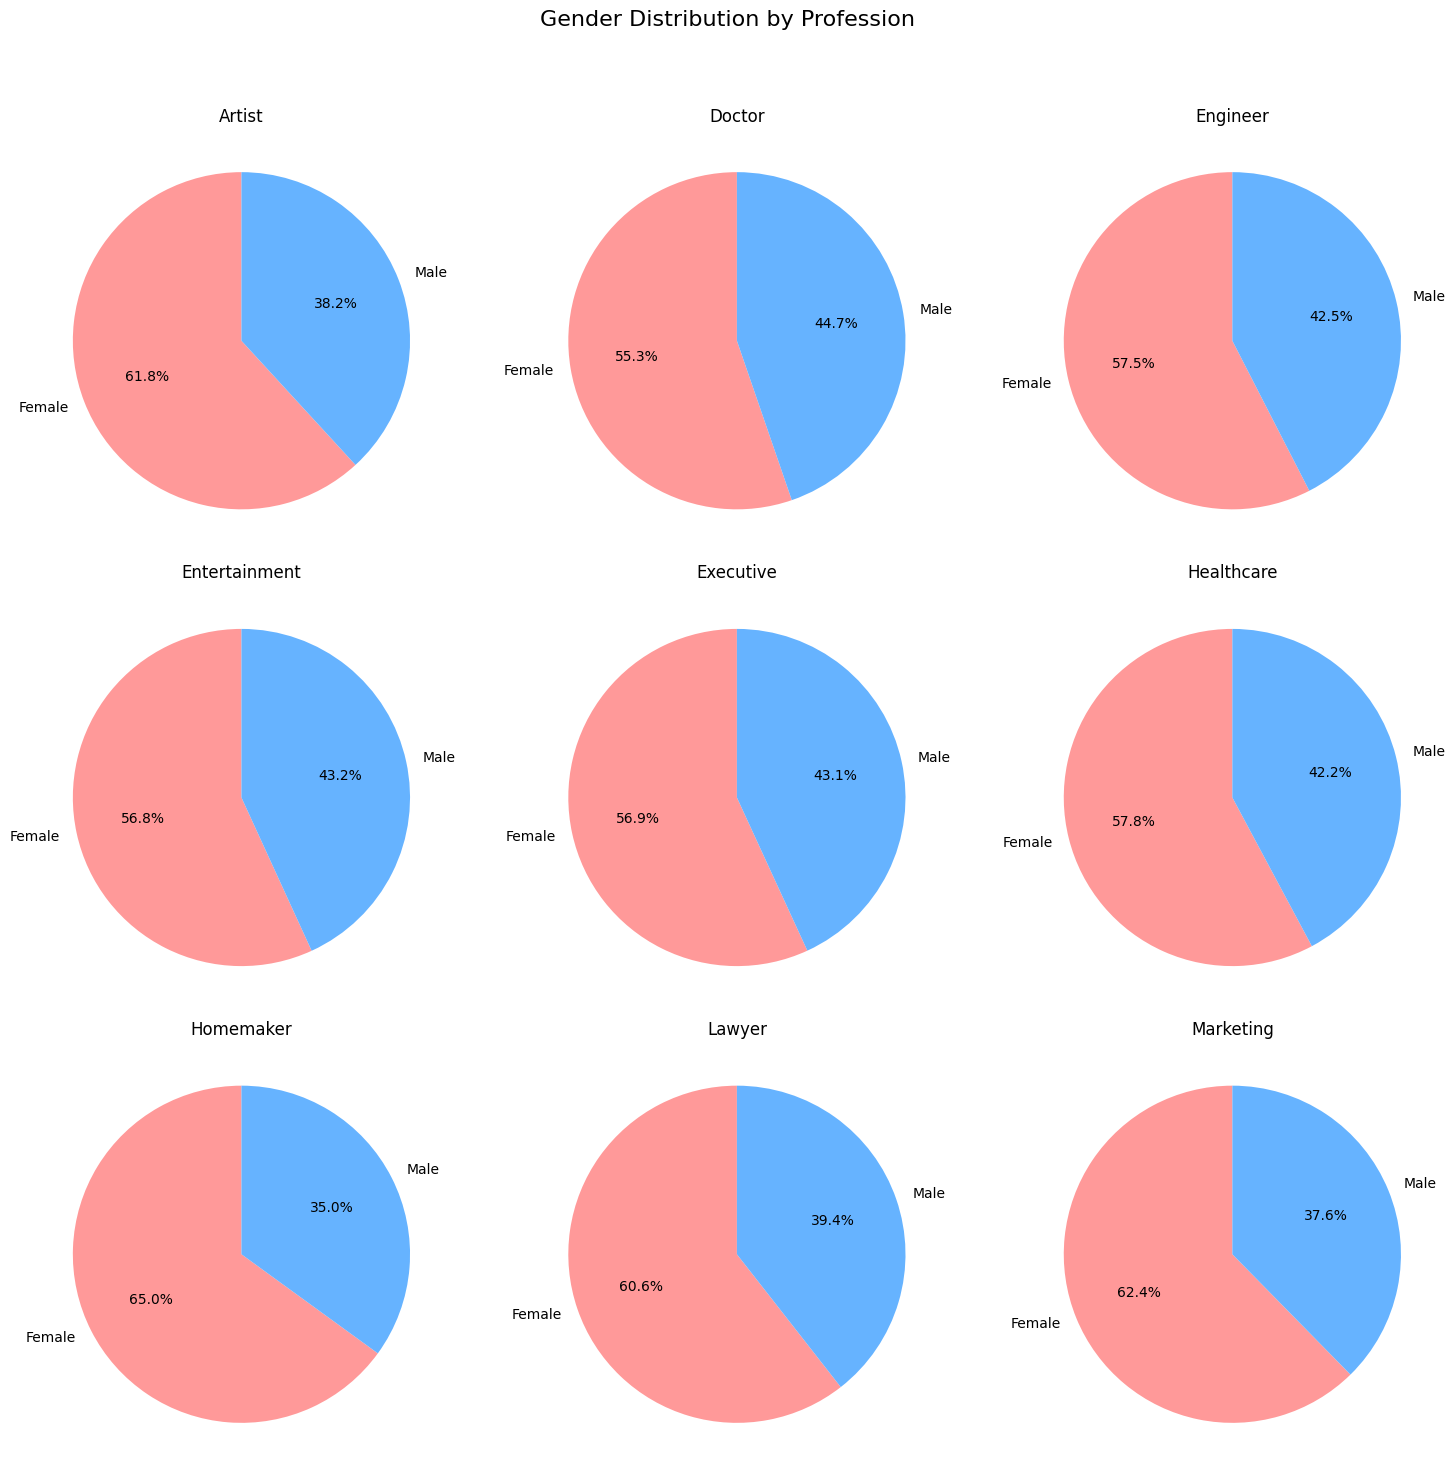

In [ ]:
columns_to_drop = ['Spending Score (1-100)','Annual Income ($)','Work Experience','Family Size','Age']
z = df.drop(columns=columns_to_drop , axis = 1 , inplace = False)

# Group by 'Profession' and 'Gender' and count the occurrences
grouped_data = z.groupby(['Profession', 'Gender']).size().reset_index(name='Count')

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create a pie chart for each profession
professions = grouped_data['Profession'].unique()

# Set up subplots
fig ,axes= plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Gender Distribution by Profession', fontsize=16)

for i, profession in enumerate(professions):
    z = grouped_data[grouped_data['Profession'] == profession]
    labels = z['Gender']
    sizes = z['Count']

    # Plot the pie chart
    ax = axes[i//3, i%3]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90 , colors = colors)
    ax.set_title(profession)


plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


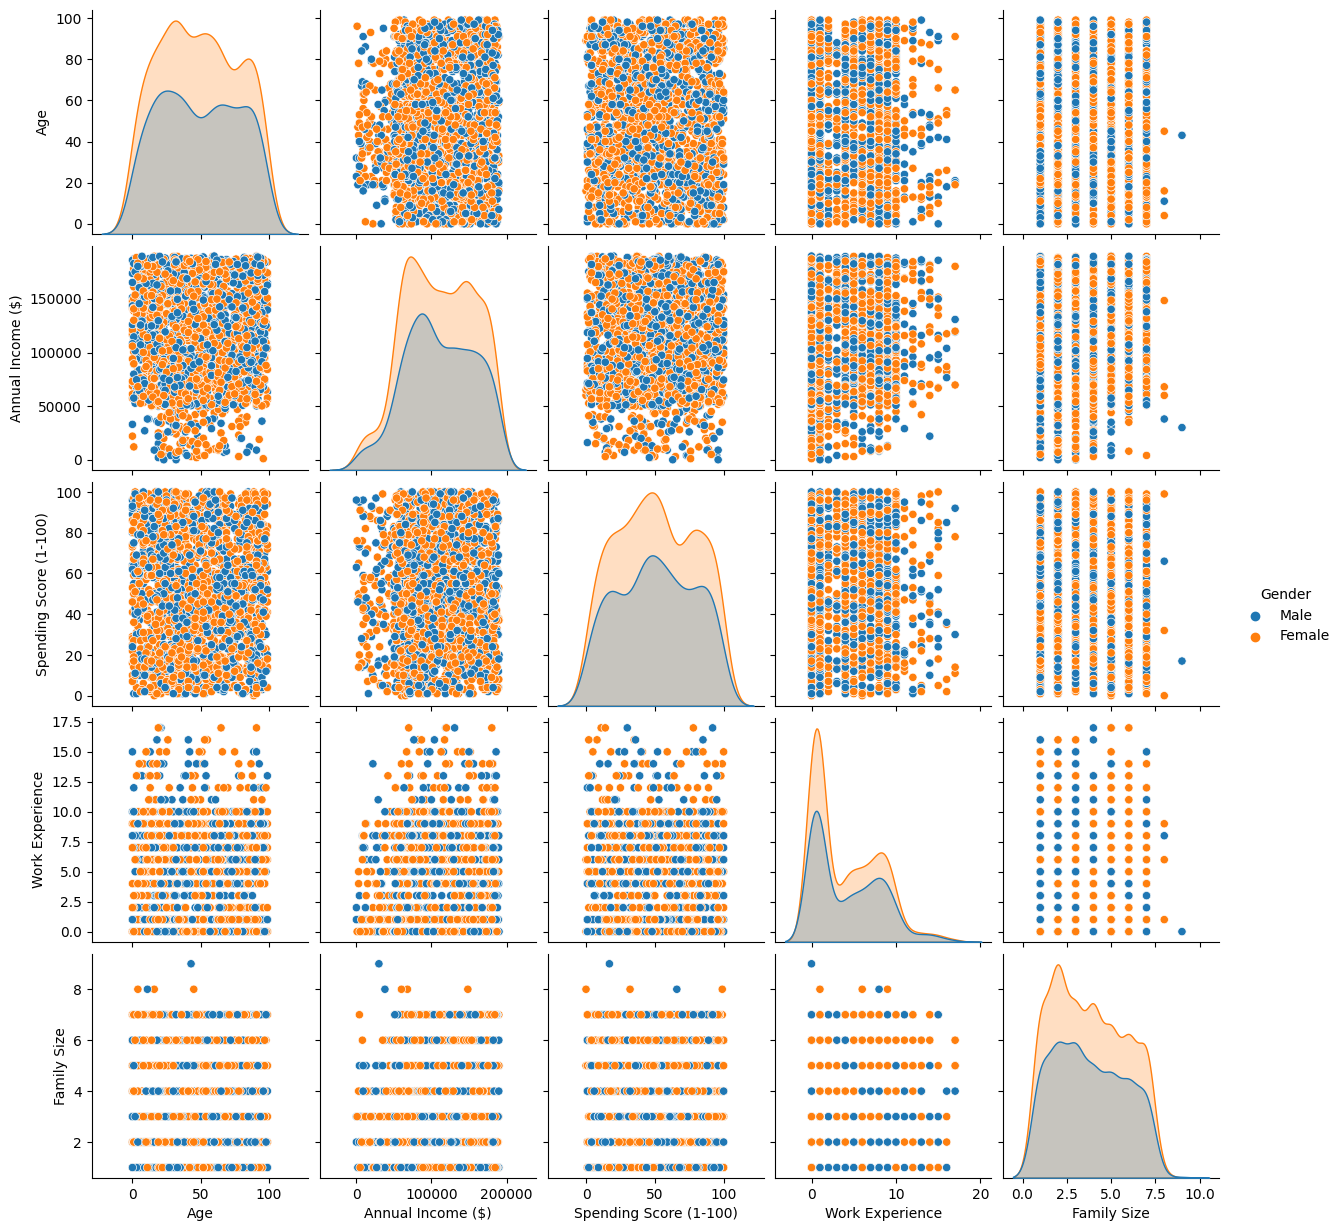

In [ ]:
sns.pairplot(data=df , hue='Gender')

In [ ]:
df['Age'] = ((df['Age'] - df['Age'].min())/( df['Age'].max() - df['Age'].min())) *9 + 1
df['Annual Income ($)'] = ( df['Annual Income ($)'] - df['Annual Income ($)'].min())/( df['Annual Income ($)'].max() - df['Annual Income ($)'].min()) *9 + 1
df['Spending Score (1-100)'] = (( df['Spending Score (1-100)'] - df['Spending Score (1-100)'].min()) / ( df['Spending Score (1-100)'].max() - df['Spending Score (1-100)'].min())) * 9 + 1
df['Work Experience'] = (( df['Work Experience'] - df['Work Experience'].min()) / ( df['Work Experience'].max() - df['Work Experience'].min())) *9 + 1
df['Family Size'] = (( df['Family Size']) - df['Family Size'].min()) / ( df['Family Size'].max() - df['Family Size'].min()) *9 + 1

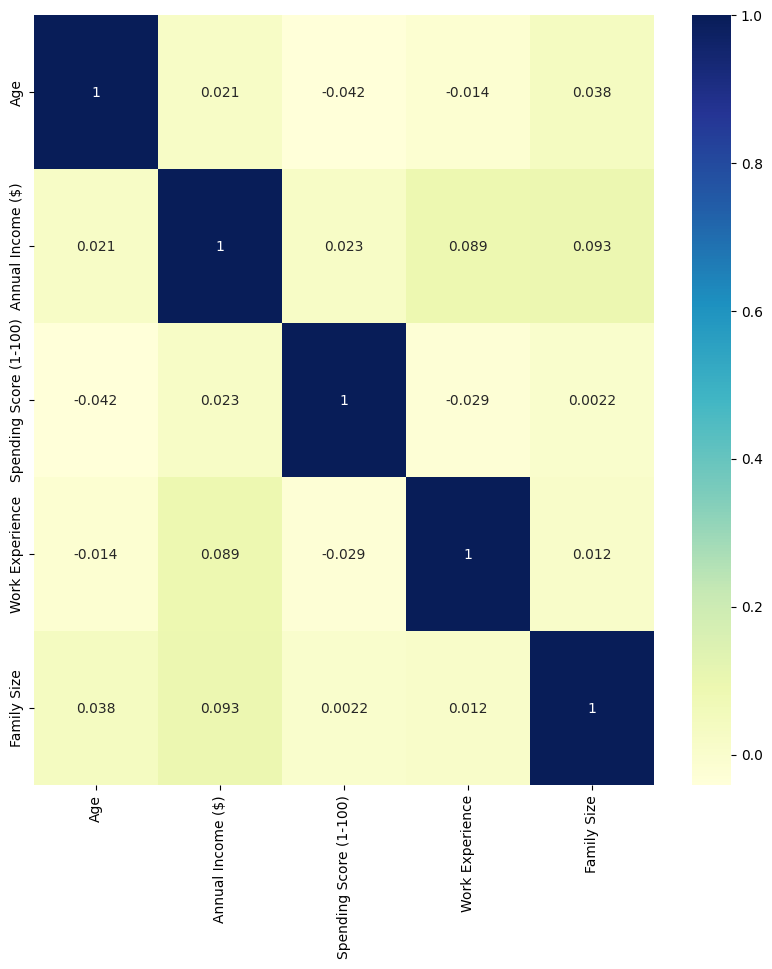

In [ ]:
column_droped = [ 'Gender' , 'Profession']
data = df.drop( columns = column_droped , axis = 1 , inplace = False )
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

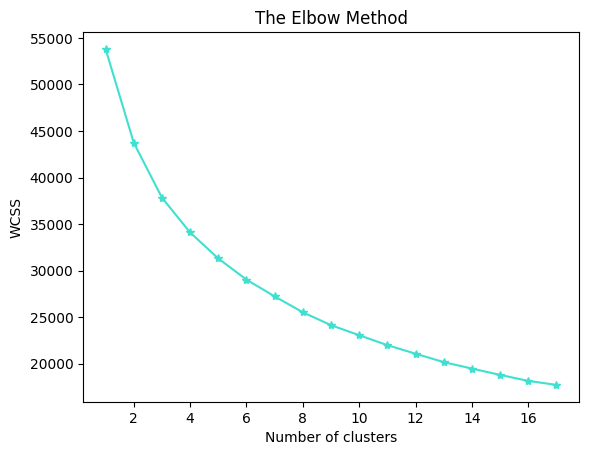

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
column_droped = [ 'Gender' , 'Profession']
data = df.drop( columns = column_droped , axis = 1 , inplace = False )
data

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,2.727273,1.710624,4.51,1.529412,4.375
1,2.909091,2.658122,8.29,2.588235,3.250
2,2.818182,5.074242,1.54,1.529412,1.000
3,3.090909,3.795119,7.93,1.000000,2.125
4,3.818182,2.800246,4.60,2.058824,6.625
...,...,...,...,...,...
1995,7.454545,9.735316,4.60,5.235294,7.750
1996,9.272727,4.465853,3.88,4.705882,7.750
1997,8.909091,5.309269,2.26,5.764706,2.125
1998,8.000000,9.627396,1.36,4.705882,2.125


In [ ]:
# taking 3 centeroids
k = 3

In [ ]:
def random_centeroids( data , k ):
    centeroids = []
    for i in range(k):
        centeroid = data.apply(lambda x: float(x.sample()))
        centeroids.append(centeroid)
    return pd.concat(centeroids , axis = 1 )

In [ ]:
centeroids = random_centeroids( data , 4 )

C:\Users\abhid\AppData\Local\Temp\ipykernel_21948\3678311466.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centeroid = data.apply(lambda x: float(x.sample()))


In [ ]:
centeroids

,0,1,2,3
Age,9.727273,3.181818,8.181818,2.181818
Annual Income ($),5.332719,4.237648,3.593965,3.463495
Spending Score (1-100),5.860000,5.950000,4.240000,8.380000
Work Experience,4.705882,2.058824,5.764706,4.176471
Family Size,4.375000,5.500000,5.500000,1.000000


In [ ]:
def get_labels( data , centeroids):
    distance = centeroids.apply(lambda x: np.sqrt(((data - x ) **2).mean( axis = 1)))
    return distance.idxmin( axis = 1)

In [ ]:
labels = get_labels( data , centeroids )

In [ ]:
labels.value_counts()

1    876
0    609
3    275
2    240
Name: count, dtype: int64

In [ ]:
def new_centeroid( data , labels , k ):
    return data.groupby(labels).apply((lambda x: np.exp(np.log(x)).mean()))

In [ ]:
new_centeroids = new_centeroid( data , labels ,  k )

In [ ]:
new_centeroids.T

,0,1,2,3
Age,8.239887,3.808115,6.781061,3.346777
Annual Income ($),6.975273,6.273965,5.109523,5.533087
Spending Score (1-100),5.979113,5.265445,3.364375,7.679964
Work Experience,3.149812,2.472804,5.188971,3.687487
Family Size,3.855911,4.757705,4.932812,1.924545


In [ ]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [ ]:
def ploting_cluster( data , new_centeroids , labels , iteration ):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centeroids_2d = pca.fit_transform(new_centeroids.T)
    clear_output(wait = True)

    plt.title(f'iteration{iteration}' )
    plt.scatter( x = data_2d[:,0] , y = data_2d[:,1] , c = labels)
    #plt.scatter(x=centeroids_2d[:, 0], y=centeroids_2d[:, 1] )
    plt.show()

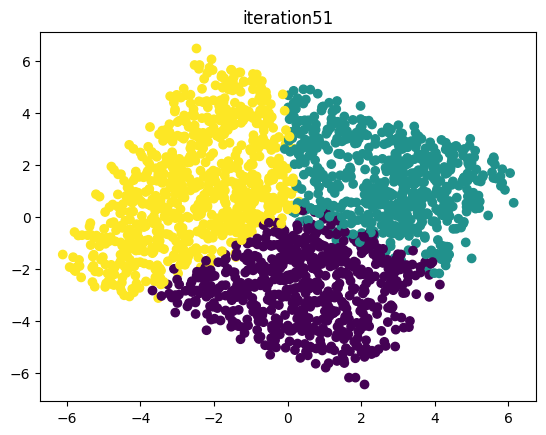

In [ ]:
max_iteration = 100
k = 3
centeroids = random_centeroids( data, k)
old_centeroids = pd.DataFrame()
iteration = 1

while (iteration <= max_iteration and not centeroids.equals(old_centeroids)):
    old_centeroids = centeroids

    labels = get_labels( data, centeroids )
    new_centeroids = new_centeroid( data , labels , k )
    centeroids = new_centeroids.T
    plot_cluster = ploting_cluster( data ,  new_centeroids ,  labels  , iteration)
    iteration += 1
